<a href="https://colab.research.google.com/github/somilasthana/MachineLearningSkills/blob/master/AdaBoosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
"""
AdaBoost:
The core principle of AdaBoost is to fit a sequence of weak learners on repeatedly modified version of data.
Each model may do slightly better than random guessing.

The predictions from all of them is combined thru weighted sum to produce a final predictions.

Initially weights for w_1, w_2,..., w_N are set to 1 / N

In successive steps, the sample of weights are individually modified and the learning algo is reapplied to weights.
At a given step, those training examples that were incorrectly predicted in previous step have their weight increased
while the one which were predicted have their weight decreased.

In other words, as iteration proceed examples that are difficult to predict receive ever increasing influence
Each weak learner is thereby forced to concentrate on the examples that where missed by the previous one.

weak learner are decision stumps

"""

In [0]:
"""
Parameters:

n_estimators: Number of weak learners

learning_rate: contribution of the weak learner in the final outcome

base_estimator :Different weak learners can be specified through this parameter.
"""

In [0]:
"""
Comparing AdaBoost with RandomForest on Generated Dataset
"""

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [0]:
rng = np.random.RandomState(42)

X = np.linspace(0, 6, 100)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])


In [0]:
reg_rf  = RandomForestRegressor(n_estimators=300, max_depth=4, random_state=rng)
reg_ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=rng)

In [12]:
reg_rf.fit(X, y)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False,
                      random_state=<mtrand.RandomState object at 0x7f0cdf6ca7e0>,
                      verbose=0, warm_start=False)

In [13]:
reg_ada.fit(X, y)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                       max_depth=4,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort=False,
                                                       random_state=None,
                                                       splitter='best'),
                  learning_rate=1.0, loss='linear', n_estimators=300,
                  random_

In [0]:
y_rf = reg_rf.predict(X)
y_ada = reg_ada.predict(X)

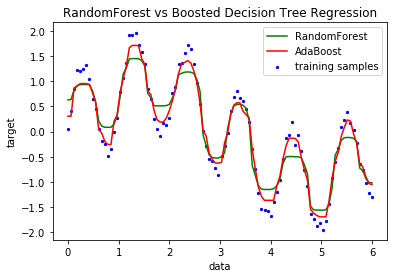

In [18]:
plt.scatter(X, y, c="b", label="training samples", s=5)
plt.plot(X, y_rf, c="g", label="RandomForest")
plt.plot(X, y_ada, c="r", label="AdaBoost")
plt.xlabel("data")
plt.ylabel("target")
plt.title("RandomForest vs Boosted Decision Tree Regression")
plt.legend()

In [0]:
"""
Observation: AdaBoosts perform better than RandomForest for the same number of estimators.
"""